# **Garment Production Data Analysis and Insights**
********************************************************************************

This is a Data Analysis project to analyse the data of a Garment production unit. It majorly focusses to find the factors that affects the productivity of employees of this unit. It will also focus on how much employees could meet the target productivity. This project will provide meaningful insights into all these.

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Importing the data set and displaying basic information about it
***********************************************************************************

In [3]:
df = pd.read_csv("garments_worker_productivity.csv")

In [4]:
# 1. Number of rows and columns
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (1197, 15)


In [5]:
# 2. Data types of each column
print("\nData Types:", df.dtypes)


Data Types: date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [5]:
# 3. Basic informations about the data set
print("\n*****First 5 rows (head):*****")
print(df.head())

print("\n*****General Information (info):*****")
df.info()

print("\n*****Statistical Summary (describe):*****")
print(df.describe())


*****First 5 rows (head):*****
       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1           

## Data Preprocessing
*********************************************************************************

In [6]:
# --- 1. Handling Missing Values ---
#We can see from the details displayed above that wip has 691 missing values.
# We can fill these with 0, assuming no work was in progress for those instances.
df['wip'] = df['wip'].fillna(0)

In [7]:
#2. Removing Duplicates
df = df.drop_duplicates()

In [8]:
#3. Correcting Data Types & Cleaning Strings
# Strip whitespace from 'department' and fix spelling ('sweing' -> 'sewing')
df['department'] = df['department'].str.strip().replace('sweing', 'sewing')

In [9]:
#Convert 'date' from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [10]:
#4. Creating Derived Columns
#Creating a dervied column to identify the gap between actual and targeted productivity
df['productivity_gap'] =  df['actual_productivity'] - df['targeted_productivity']

#printing the dataset after the column addition
print(df)

           date   quarter department        day  team  targeted_productivity  \
0    2015-01-01  Quarter1     sewing   Thursday     8                   0.80   
1    2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2    2015-01-01  Quarter1     sewing   Thursday    11                   0.80   
3    2015-01-01  Quarter1     sewing   Thursday    12                   0.80   
4    2015-01-01  Quarter1     sewing   Thursday     6                   0.80   
...         ...       ...        ...        ...   ...                    ...   
1192 2015-03-11  Quarter2  finishing  Wednesday    10                   0.75   
1193 2015-03-11  Quarter2  finishing  Wednesday     8                   0.70   
1194 2015-03-11  Quarter2  finishing  Wednesday     7                   0.65   
1195 2015-03-11  Quarter2  finishing  Wednesday     9                   0.75   
1196 2015-03-11  Quarter2  finishing  Wednesday     6                   0.70   

        smv     wip  over_time  incenti

In [12]:
#5. Filtering and Aggregating data

#Step 1 : Filtering data based on Quarter 1
q1_data = df[df['quarter'] == 'Quarter1']

#Step 2 : Aggregating the data to see the average performance values
q1_dept_performance = q1_data.groupby('department').agg({
    'actual_productivity': 'mean',
    'targeted_productivity': 'mean',
    'productivity_gap': 'mean'
}).reset_index()

#Printing the department wise performance values
print(q1_dept_performance)

  department  actual_productivity  targeted_productivity  productivity_gap
0  finishing             0.758482               0.747315          0.011167
1     sewing             0.746671               0.741801          0.004870


In [20]:
#Printing the complete data set after cleaning

print(df)

           date   quarter department        day  team  targeted_productivity  \
0    2015-01-01  Quarter1     sewing   Thursday     8                   0.80   
1    2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2    2015-01-01  Quarter1     sewing   Thursday    11                   0.80   
3    2015-01-01  Quarter1     sewing   Thursday    12                   0.80   
4    2015-01-01  Quarter1     sewing   Thursday     6                   0.80   
...         ...       ...        ...        ...   ...                    ...   
1192 2015-03-11  Quarter2  finishing  Wednesday    10                   0.75   
1193 2015-03-11  Quarter2  finishing  Wednesday     8                   0.70   
1194 2015-03-11  Quarter2  finishing  Wednesday     7                   0.65   
1195 2015-03-11  Quarter2  finishing  Wednesday     9                   0.75   
1196 2015-03-11  Quarter2  finishing  Wednesday     6                   0.70   

        smv     wip  over_time  incenti

### Discussing about the steps followed for data preprocessing
****************************************************************************

1. Handled missing values by filling the missing wip column values with 0
2. Removed duplicates from the data set
3. Striped white spaces from the department column values and corrected spelling of the Sewing department. Converted date column from Object type to Datetime.
4. Created a derived column called prodcutivity_gap which will help to understand quickly if the target has been met or not!

After performing these steps, filtered the values of Quarter 1, to find the mean of Actual productivity, Target productivity and the Productivity gap. This helped in understanding that both the departments met their target for the Quarter 1 successfully!

## Exploratory Data Analysis (EDA)
*****************************************************************************

In [15]:
#First let's look at the statistical summary of the data set after cleaning, for the variables mentioned below, 
#which will help us to gain some insights into productivity

print(df[['no_of_workers', 'targeted_productivity', 'actual_productivity']].describe())

       no_of_workers  targeted_productivity  actual_productivity
count    1197.000000            1197.000000          1197.000000
mean       34.609858               0.729632             0.735091
std        22.197687               0.097891             0.174488
min         2.000000               0.070000             0.233705
25%         9.000000               0.700000             0.650307
50%        34.000000               0.750000             0.773333
75%        57.000000               0.800000             0.850253
max        89.000000               0.800000             1.120437


### Statistical Summary based on the results above
****************************************************************************

Count: 1197 : Shows as a CONSISTENT result across all the variables, which means, the data values are consistent and doesnot contain any anomalies.

Mean : The Mean Actual Productivity (0.735) is slightly higher than the Mean Targeted Productivity (0.729). This indicates that, on average, the factory is meeting its goals.

Standard Deviation : The Standard Deviation for Targeted Productivity (0.098) is much lower than for Actual (0.174). This means management sets very consistent, stable goals, but the actual output of the workers varies significantly.

Minimum/Maximum : The dataset shows worker size in a wide range with a minimum of 2 till a maximum of 89. In both the parameters of min/max, team is exceptionally handling the targeted producitivity, with OVER PERFORMING in all means.

Percentiles : On the 25% quartile, workers are almost hitting the targeted productivity. For the other percentiles, team is OVER PERFORMING, which shows greater efficiency and consistency in achieving goals set by the organization!


In [18]:
#GroupBy Analysis of the productivity matrices by department 

dept_stats = df.groupby('department').agg({
    'productivity_gap': 'mean',
    'incentive': 'mean',
    'over_time' : 'mean'
})

print("****Department wise productivity results****")
print(dept_stats)

****Department wise productivity results****
            productivity_gap  incentive    over_time
department                                          
finishing           0.015599  29.644269  1917.154150
sewing             -0.001967  44.483357  6508.205499


### Groupby analysis
*****************************************************************************

On average, Finishing department shows positive producvity gap, which means it meets productivity. While Sewing department shows a negative trend on productivity gap, without meeting the target!

Incentives are higher for Sewing department, on which, workers are not performing well! They are missing the target most of the time. While for Finishing department, workers are over performing even on lower incentive scale!

Over time shows a very high value for the Sewing department where productivity gap is negative. So, we can conclude from this that merely doing over time is not enough to attain productivity.

In [19]:
#Pivot Table analysis on Quarterly trends

quarter_pivot = df.pivot_table(values='productivity_gap', index='department', columns='quarter', aggfunc='mean')

print("****Department wise quarterly trend on productivity****")
print(quarter_pivot)


****Department wise quarterly trend on productivity****
quarter     Quarter1  Quarter2  Quarter3  Quarter4  Quarter5
department                                                  
finishing   0.011167  0.026389 -0.005565 -0.008360  0.176364
sewing      0.004870  0.000073 -0.023255 -0.003204  0.045572


### Pivot table analysis
****************************************************************************

From the results, we can identify that both the departments have OVER PERFORMED for majority of the quarters(Q1, Q2, Q5). Q3 and Q4 shows negative trend towards productivity gap, which depicts that they have missed targets for these 2 quarters. An observation is that the gap is significantly low for these 2 quarters.

## Visualizations
**********************************************************************************

array([[<Axes: title={'center': 'targeted_productivity'}>,
        <Axes: title={'center': 'actual_productivity'}>],
       [<Axes: title={'center': 'productivity_gap'}>,
        <Axes: title={'center': 'incentive'}>],
       [<Axes: title={'center': 'no_of_workers'}>,
        <Axes: title={'center': 'over_time'}>]], dtype=object)

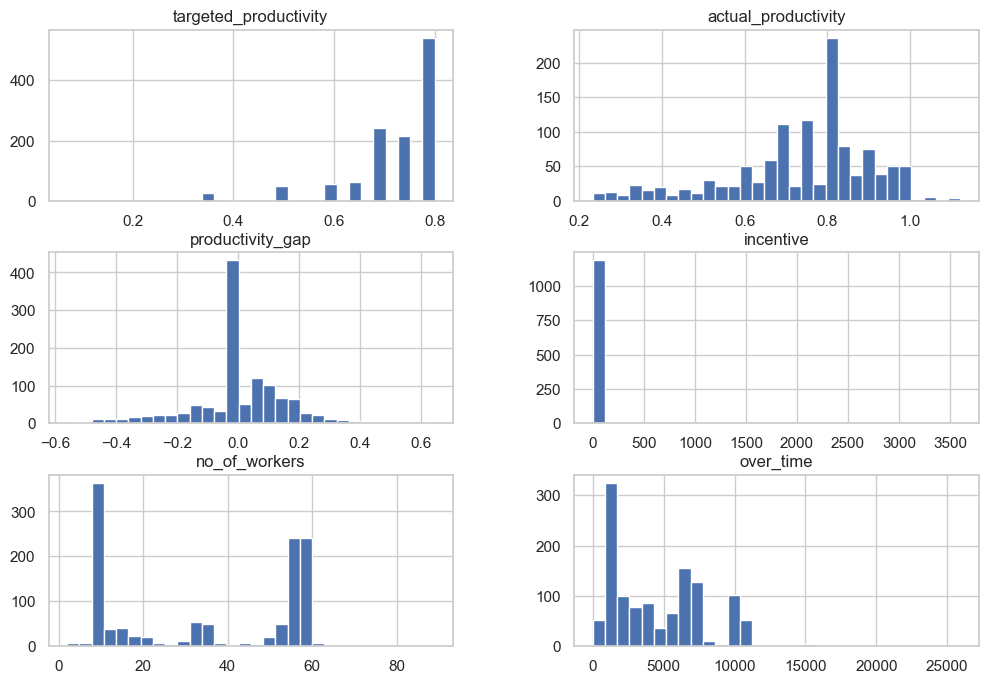

In [35]:
#Histogram

#Numerical values - selected few values to show their value trends

chart_cols = ['targeted_productivity','actual_productivity','productivity_gap','incentive','no_of_workers','over_time']
df[chart_cols].hist(bins=30, figsize=(12,8))

#The Histogram plotted here shows the trends of the values listed above. 

### Major insight from Histogram

Most teams are achieving an actual productivity between 0.60 and 0.80.
There is a noticeable "left tail" in the distribution, showing that while most days are successful, 
there are rare days where productivity crashes below 40%.

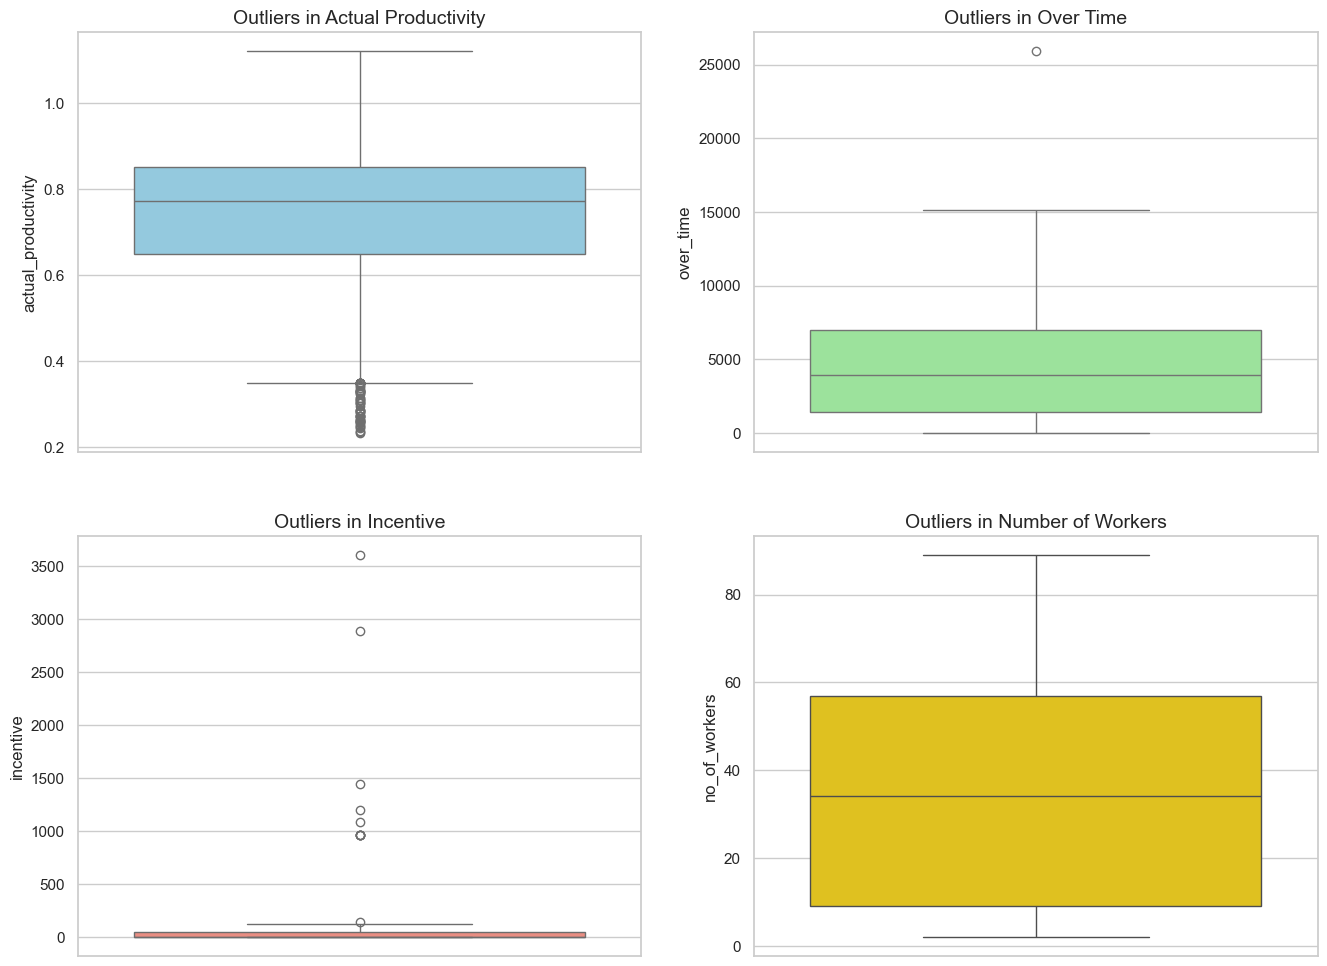

In [47]:
#Box plot to identify the outliers of few paraneters as listed below

# Create a layout for multiple box plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual Productivity Outliers
sn.boxplot(data=df, y='actual_productivity', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Outliers in Actual Productivity', fontsize=14)

# 2. Overtime Outliers
sn.boxplot(data=df, y='over_time', color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Outliers in Over Time', fontsize=14)

# 3. Incentive Outliers
sn.boxplot(data=df, y='incentive', color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Outliers in Incentive', fontsize=14)

# 4. No. of Workers Outliers
sn.boxplot(data=df, y='no_of_workers', color='gold', ax=axes[1, 1])
axes[1, 1].set_title('Outliers in Number of Workers', fontsize=14)

plt.show()

### Major insights from Box plot of certain values

Extreme Incentives: The incentive column shows massive outliers. This indicates that performance bonuses are not distributed evenly, they are concentrated in a few high-performing instances.

Overtime Variability: Overtime also shows high-end outliers, suggesting that specific teams are often pushed significantly beyond normal working hours.

C:\Users\USER\AppData\Local\Temp\ipykernel_14672\505764046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=quarter_gap.index, y=quarter_gap.values, palette = 'viridis')


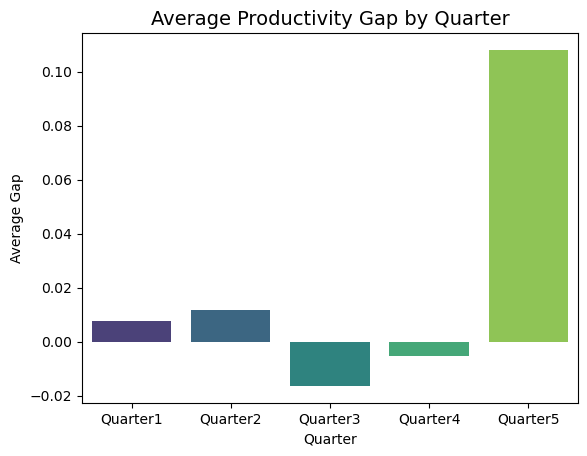

In [16]:
# Bar Plot: Performance throughout the Quarters

quarter_gap = df.groupby('quarter')['productivity_gap'].mean().sort_index()
sn.barplot(x=quarter_gap.index, y=quarter_gap.values, palette = 'viridis')
plt.title('Average Productivity Gap by Quarter', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('Average Gap')
plt.show()

#The plot shows the variations of production gap across quarters. It clearly depicts that the Quarters 3 and 4 is
#showing negative trend towards productiving indicating targets being missed.

### The insight from Quarter wise Bar plot

Productivity peaked for the Quarter 5 significantly!

In contrast, producitivity dipped to negative for the Quarters of 3 and 4. This suggests a need for the management to look into factors that might affect the productivity.

C:\Users\USER\AppData\Local\Temp\ipykernel_14672\1393371063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='department', y='productivity_gap', data=df, palette='Set3')


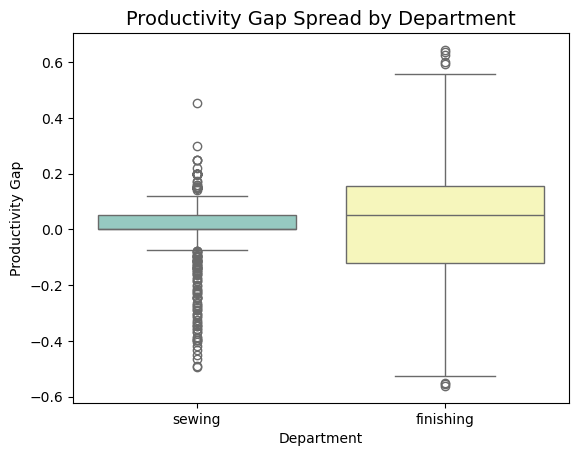

In [15]:
# Box Plot: Comparing stability between Sewing and Finishing

sn.boxplot(x='department', y='productivity_gap', data=df, palette='Set3')
plt.title('Productivity Gap Spread by Department', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Productivity Gap')
plt.show()

### Box plot analysis on Department and Productivity Gap

Finishing is more efficient but less stable: The median line for Finishing is above zero, meaning they frequently exceed their targets. However, the larger "box" and longer whiskers show that their performance fluctuates significantly from day to day.

Sewing is consistent but underperforming: The Sewing department has a much "tighter" box, meaning their daily output is very predictable. Unfortunately, their median sits slightly below zero, indicating that they are consistently missing their targets by a small margin.

Outliers: Both departments show "outlier" dots at the bottom. These represent rare days of extreme failure. This is more seen for the Sewing department.

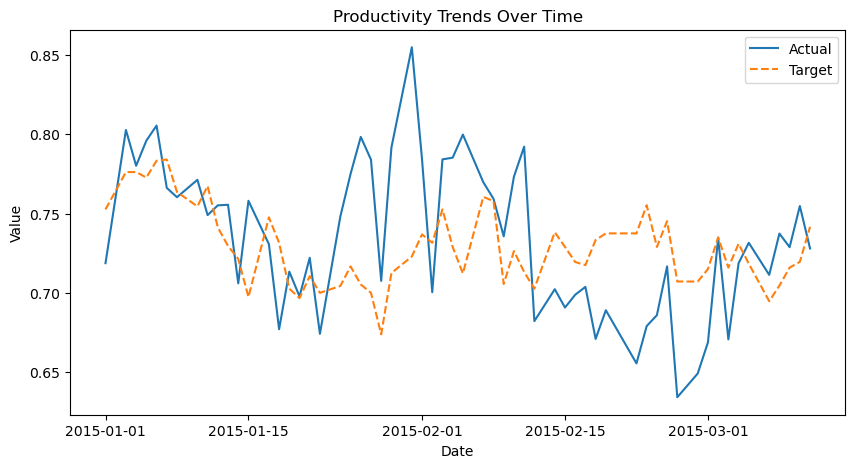

In [14]:
#Creating the Trend Line Chart

plt.figure(figsize=(10, 5))
daily_prod = df.groupby('date')[['actual_productivity', 'targeted_productivity']].mean().reset_index()
sn.lineplot(data=daily_prod, x='date', y='actual_productivity', label='Actual')
sn.lineplot(data=daily_prod, x='date', y='targeted_productivity', label='Target', linestyle='--')
plt.title('Productivity Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

### Trend Analysis

The line representing Target productivity, being aroud a range always conveys that the management is setting similar goals without considering external factors. Such kind of approach can bring in employee disatisfaction. 

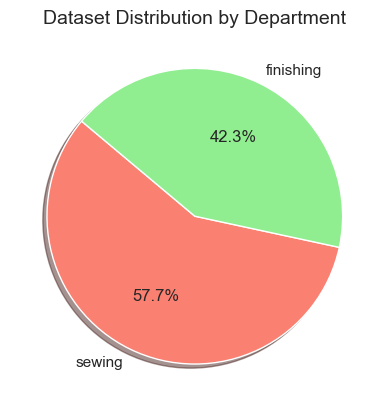

In [57]:
# Pie Chart: Composition of the workforce

dept_counts = df['department'].value_counts()
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140, colors=['salmon','lightgreen'],shadow=True)
plt.title('Dataset Distribution by Department', fontsize=14)
plt.show()

### Pie Chart Analysis

Work force is mostly from the Sewing department, showing a majority of 57.7% among all the workers.

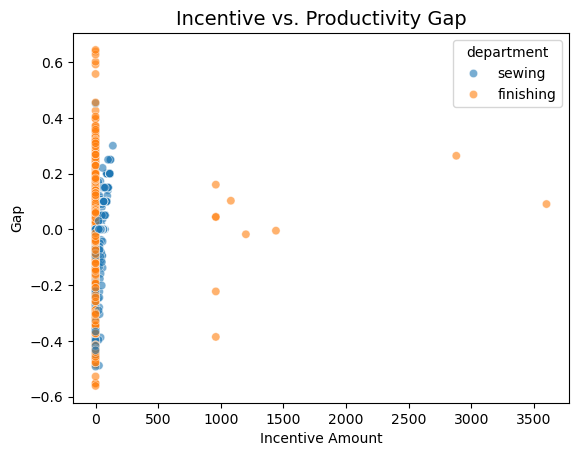

In [17]:
# Scatter Plot: Does more incentive lead to beating targets?

sn.scatterplot(data=df, x='incentive', y='productivity_gap', hue='department', alpha=0.6)
#axes[1].set_xlim(0, 250) # Focusing on the most common incentive range
plt.title('Incentive vs. Productivity Gap', fontsize=14)
plt.xlabel('Incentive Amount')
plt.ylabel('Gap')
plt.show()

### Scatter Plot Analysis

The scatter plot shows a very weak relationship between incentives and the productivity gap. Teams with 0 incentives often beat their targets, while some with high incentives still underperform. This suggests that financial rewards alone aren't the primary driver of efficiency in this factory.

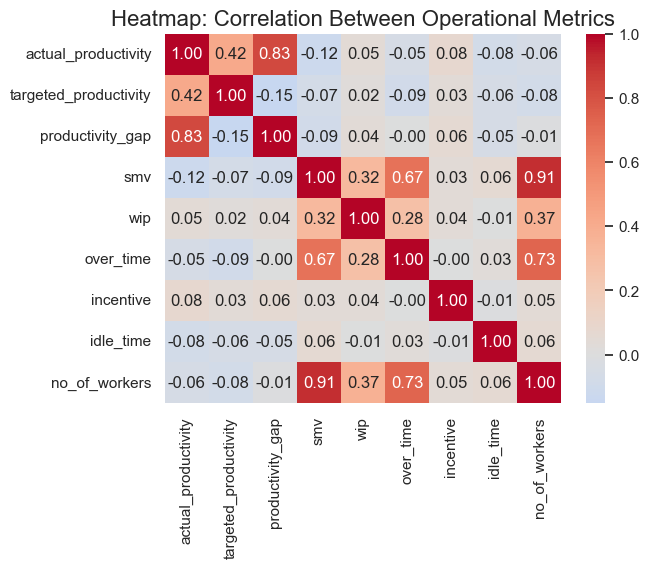

In [61]:
#Heat map - correlation among some values of the data set matters!

corr_cols = ['actual_productivity', 'targeted_productivity', 'productivity_gap', 
             'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'no_of_workers']
corr_matrix = df[corr_cols].corr()

sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Heatmap: Correlation Between Operational Metrics', fontsize=16)
plt.show()

In [11]:
### A Sub Analysis of Correlation that will give more insight into factors that affect productivity

# Calculate the exact correlation numbers
correlations = df[['actual_productivity', 'incentive', 'over_time', 'smv']].corr()
print(correlations['actual_productivity'])

actual_productivity    1.000000
incentive              0.076538
over_time             -0.054206
smv                   -0.122089
Name: actual_productivity, dtype: float64


### The Correlation Insights

The Incentives (0.076): There is a near-zero correlation between incentives and productivity. This suggests that incentives are not having much effects on the workers productivity.

The Over Time (-0.05): Over Time shows a negative correlation with Actual productivity, which means that staying more hours is only helping for a lower producivity. Fatigue can be a reason for this. 

The Work Complexity - smv (-0.12): smv also shows a negative correlation with the Actual productivity, which means management have to find ways to reduce the work complexity or better train the workers to understand the complex work problems.

## Root cause analysis for the under performace of Quarter 3 and Quarter 4

In [12]:
# Simple comparison of all factors across quarters
quarterly_analysis = df.groupby('quarter')[['productivity_gap', 'idle_time', 'smv', 'incentive', 'no_of_workers']].mean()
print(quarterly_analysis)

          productivity_gap  idle_time        smv  incentive  no_of_workers
quarter                                                                   
Quarter1          0.007476   2.300000  14.995528  27.450000      34.843056
Quarter2          0.011620   0.000000  14.830597  69.731343      33.735821
Quarter3         -0.016432   0.180952  15.931048  23.242857      36.440476
Quarter4         -0.005449   0.032258  14.922863  24.818548      34.425403
Quarter5          0.107996   0.000000  14.008864  33.181818      31.659091


C:\Users\USER\AppData\Local\Temp\ipykernel_13076\386413526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=q_data, x='quarter', y='productivity_gap', ax=axes[0,0], palette='RdYlGn')
C:\Users\USER\AppData\Local\Temp\ipykernel_13076\386413526.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=q_data, x='quarter', y='smv', ax=axes[0,1], palette='Blues')
C:\Users\USER\AppData\Local\Temp\ipykernel_13076\386413526.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=q_data, x='quarter', y='incentive', ax=axes[1,0], palette='Green

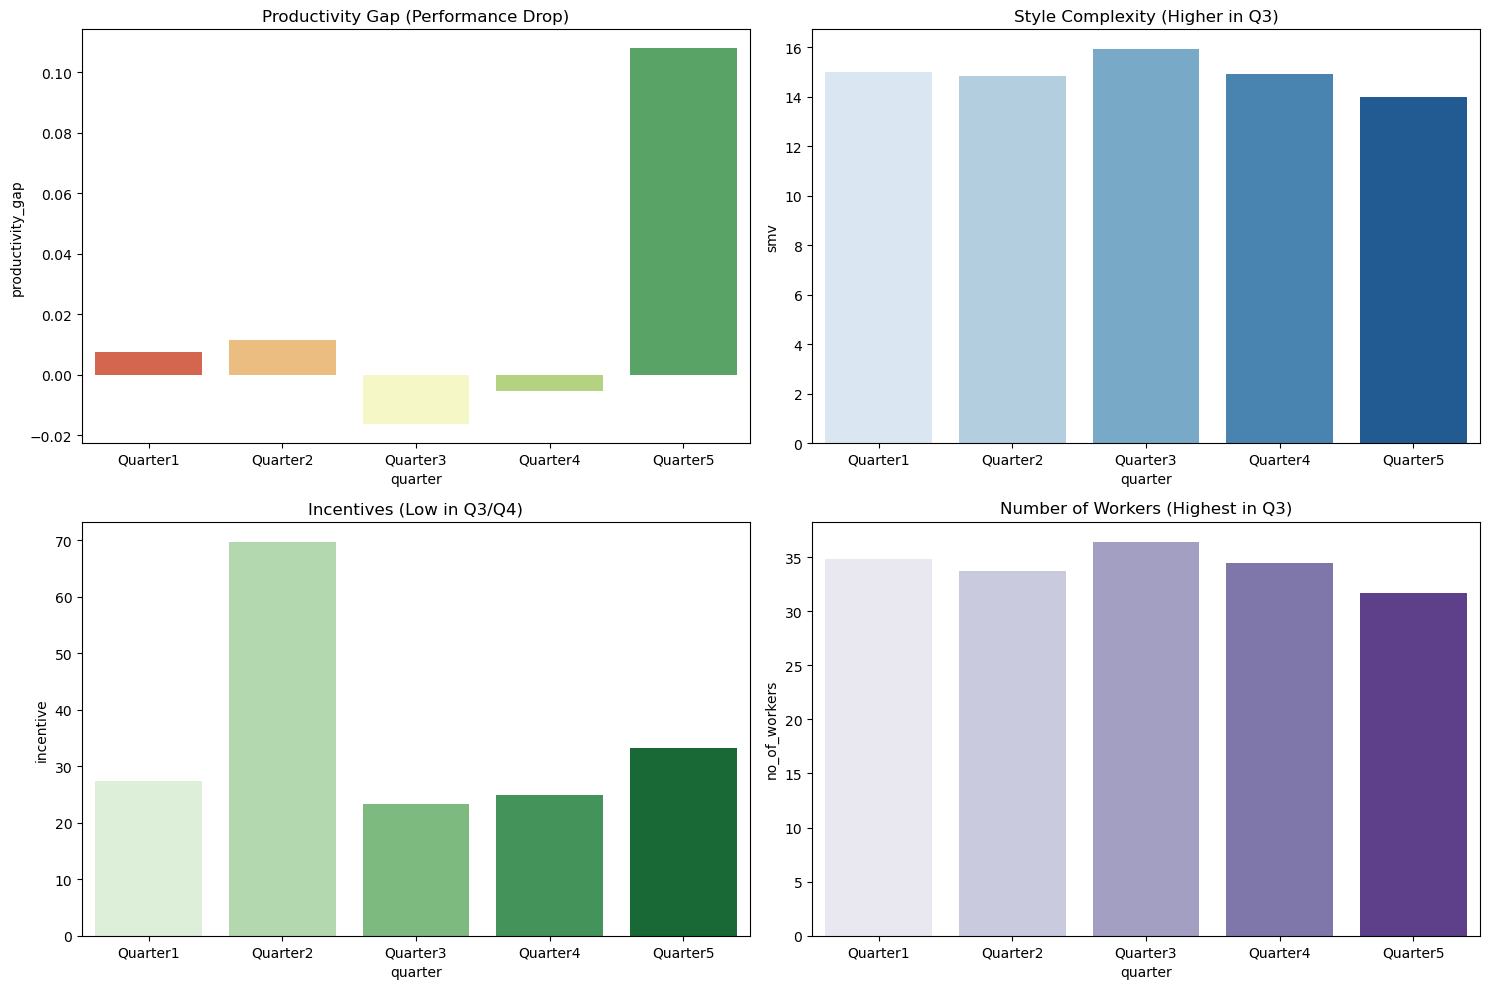

In [14]:
# 1. Prepare the data (Group by Quarter)
q_data = df.groupby('quarter')[['productivity_gap', 'smv', 'incentive', 'no_of_workers']].mean().reset_index()

# 2. Create a figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Productivity Gap (The Problem)
sn.barplot(data=q_data, x='quarter', y='productivity_gap', ax=axes[0,0], palette='RdYlGn')
axes[0,0].set_title('Productivity Gap (Performance Drop)')

# Plot 2: SMV (Style Complexity)
sn.barplot(data=q_data, x='quarter', y='smv', ax=axes[0,1], palette='Blues')
axes[0,1].set_title('Style Complexity (Higher in Q3)')

# Plot 3: Incentives (Motivation)
sn.barplot(data=q_data, x='quarter', y='incentive', ax=axes[1,0], palette='Greens')
axes[1,0].set_title('Incentives (Low in Q3/Q4)')

# Plot 4: No of Workers (Team Size)
sn.barplot(data=q_data, x='quarter', y='no_of_workers', ax=axes[1,1], palette='Purples')
axes[1,1].set_title('Number of Workers (Highest in Q3)')

plt.tight_layout()
plt.show()

### Insights from the Quarter 3 and Quarter 4 Analysis

Style Complexity (SMV): Quarter 3 had the highest average SMV (15.93) compared to Quarter 5 (14.00). This suggests that the production line was handling more complex garment designs, making it mathematically harder to hit the same productivity targets.

Incentive Reduction: Incentives in Q3 and Q4 were roughly 65% lower than in Quarter 2. This drop in financial motivation is a major factor in why the productivity_gap turned negative (missing targets).

Workforce Congestion: Quarter 3 had the highest average number of workers (36.44). The data suggests that simply adding more workers does not increase efficiency; in fact, the larger team sizes in Q3 correlated with the lowest productivity gap (-0.016).

## **Business Insights**
************************************************************************************

### Our analysis of the 1,197 records reveals a Garment factory that is generally stable but operates with significant departmental variances.
___________________________________________________________________________________________________________________

1. **General Performance** --> The factory maintains a Mean Actual Productivity of 0.735, which exceeds the Mean Target Productivity of 0.729. Though the ratio of success is significantly low, we can conclude that the factory is not running on loss.

2. **Department Wise Analysis**:
   
    Finishing Department --> Performs consistently with an Average Productivity Gap of 0.015599, which shows postive result and thereby showing that they mostly exceeds the Target Productivity.

    Sewing Department --> Operates with low performance on an Average Productivity Gap of -0.001967, which shows negative result and thereby showing that they are not achieving their goals.

3. **Analysis on OverTime and Incentives**:

     OverTime --> There is nearly zero correlation (-0.05) between overtime and beating productivity targets. High-overtime department (Sewing, averaging 6,508 minutes) are not exceeding targets when compared low-overtime Finishing department. This suggests that simply working longer hours leads to worker fatigue, which actually lowers the overall efficiency of the factory.

     Incentives --> The correlation between incentives and the productivity gap is 0.05. Though positive, it suggests only a mere impact on the productivity. The Sewing department with more Mean Incentive, 44.483357, shows poor performance compared to the Finishing department with Mean Incentive of 29.644269. This tells us that the Incentive distribution is not even and based on the actual factors that boosts up productivity.

4. **Quarter Analysis**:

     The best Quarter --> Quarter 5 is the best quarter on productivity matrices for the factory. It shows a stable productivity for both the departments.

     The worst Quarters --> Quarter 3 and 4 shows the worst productivity gap values.

5. **Style Complexity** --> The factory struggles to maintain efficiency when switching to complex styles. This suggests that the current "Target" does not sufficiently adjust for the increased difficulty of high-SMV garments.

6. **Workers Size** --> In this factory, larger teams (seen in Q3) actually correlate with a negative productivity gap. This indicates that when teams become too large, "coordination loss" occurs— meaning tasks are not allocated properly for this size resulting in lower productivity. 

## **Recommendations for Future**
_____________________________________________________________________________________

**Implement Dynamic Targeting**: Instead of a rigid target, management should adjust targets based on SMV (Complexity). When SMV is high (above 15), targets should be lowered by 5% to maintain worker morale.

**Optimize Overtime**: Since overtime shows a negative impact on efficiency, the factory should implement a "Soft Cap" on extra hours and focus on improving daytime operational flow (reducing idle time).

**Restructure Incentives**: To move the correlation from 0.076 to a meaningful level, incentives should be rewarded based on Productivity Gap (beating the target) rather than just total output.

**Quarterly Planning**: Anticipate the bottlenecks seen in Q3 and Q4 by scheduling simpler garment styles (lower SMV) or increasing technical support during these months.

### **Final Note**
______________________________________________________________________________________

Success lies not only on Hard work, but also on Smark work. Rather than spending hours doing over time and hitting harder targets, identify the factors that would work as a catalyst to enhance productivity. The path to higher productivity is through stabilizing incentives and adjusting targets to match style complexity. By addressing the operational bottlenecks identified in Q3 and Q4, the factory can move from "barely meeting targets" to consistent over-performance.
